In [7]:
import pandas as pd
import numpy as np

snp_500 = pd.read_csv('snp500_history.csv',index_col='Date').tail(100)
snp_500_close_price = pd.DataFrame(snp_500.Close)

# 순서 매기기
snp_500_close_price['time'] = np.arange(len(snp_500.index))

snp_500_close_price

,Close,time
Date,,
2023-01-10 00:00:00-05:00,3919.250000,0
2023-01-11 00:00:00-05:00,3969.610107,1
2023-01-12 00:00:00-05:00,3983.169922,2
2023-01-13 00:00:00-05:00,3999.090088,3
2023-01-17 00:00:00-05:00,3990.969971,4
...,...,...
2023-05-26 00:00:00-04:00,4205.450195,95
2023-05-30 00:00:00-04:00,4205.520020,96
2023-05-31 00:00:00-04:00,4179.830078,97


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error


matplotlib_inline.backend_inline.set_matplotlib_formats("retina") # svg, retina, png2x ...
mpl.style.use("seaborn-v0_8")
mpl.rcParams.update({"figure.constrained_layout.use": True})
sns.set_context("paper") 
sns.set_palette("Set2") 
sns.set_style("whitegrid") 

plt.rc("font", family = "Malgun Gothic")
plt.rcParams["axes.unicode_minus"] = False

In [ ]:
snp = pd.read_csv("../selfstudy/study_data/snp500_history.csv")

In [ ]:

# fig, ax = plt.subplots(1,3, figsize=(10,4))

# sns.scatterplot(data=for_graph,
#                 x="Close",
#                 y="Close_rag_2100",
#                 color = "tab:blue",
#                 alpha = 0.3,
#                 ax= ax[0])

# sns.scatterplot(data=for_graph,
#                 x="Close",
#                 y="Close_rag_7100",
#                 color = "tab:orange",
#                 alpha = 0.3,
#                 ax = ax[1])

# sns.scatterplot(data=for_graph,
#                 x="Close",
#                 y="Close_rag_17100",
#                 color = "tab:purple",
#                 alpha = 0.3,
#                 ax = ax [2])


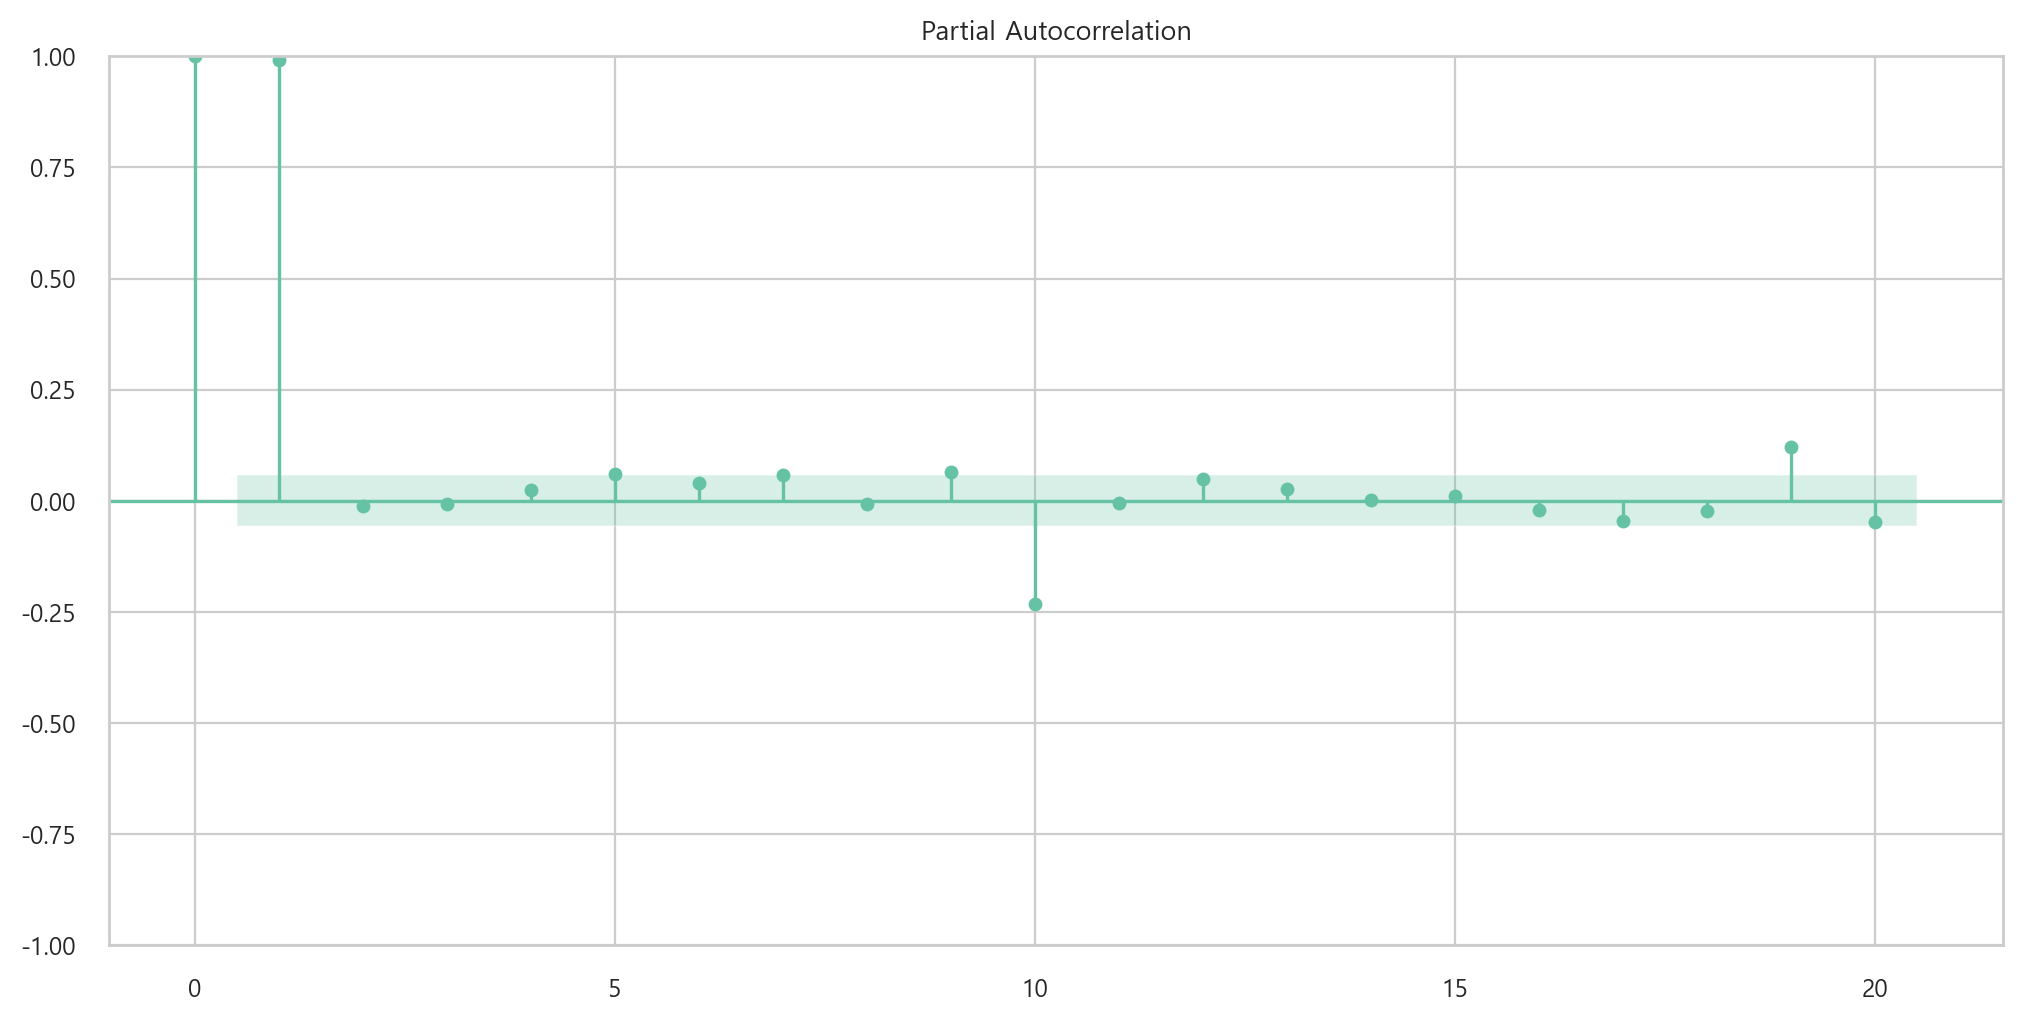

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

snp_20 = snp.iloc[0:-1:20] # 주말빼고 약 한달에 20일정도씩

fig, ax = plt.subplots(1,1, figsize=(10,5))

plot_pacf(snp_20['Close'], lags=20, ax=ax);

In [ ]:
new_snp = snp_20[["Close"]].copy()
new_snp["lag_1"] = new_snp["Close"].shift(1)
new_snp["lag_10"] = new_snp["Close"].shift(10)
new_snp["lag_19"] = new_snp["Close"].shift(19)

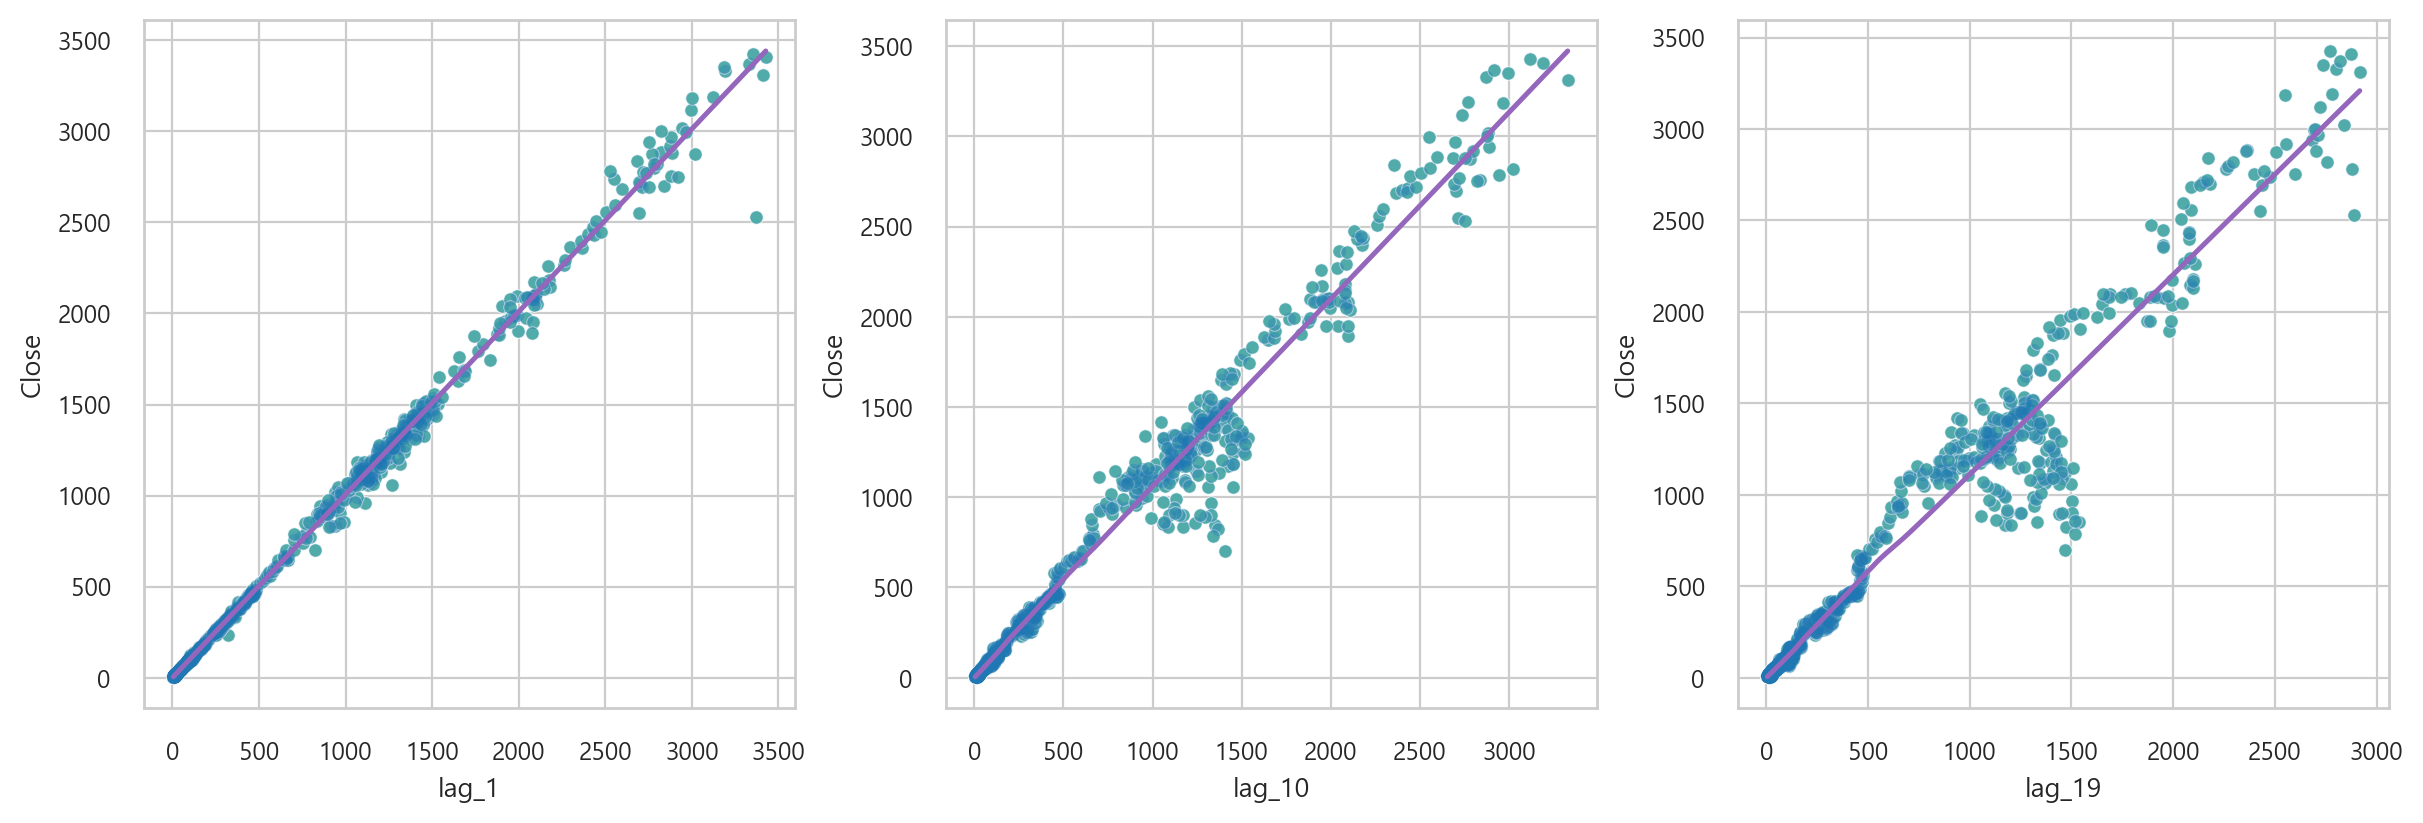

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(12,4))
lags = [1,10,19]

for i in range(len(lags)):
    sns.scatterplot(data=new_snp,
                    x="lag_" + str(lags[i]),
                    y="Close",
                    ax=ax[i])
    
    sns.regplot(data=new_snp,
                    x="lag_" + str(lags[i]),
                    y="Close",
                    scatter_kws={"color": "tab:blue", "alpha": 0.3},
                    color = "tab:purple",
                    lowess=True,
                    ax=ax[i],)

In [ ]:
new_snp.dropna(inplace=True)

In [ ]:
X = new_snp.drop(columns=["Close"])
y = new_snp["Close"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, shuffle=False)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1128, 3)
(20, 3)
(1128,)
(20,)


In [ ]:
# 1. lag 피쳐의 모델 (lag_1, lag_10, lag_19)
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X, y, test_size=20, shuffle=False)

model_f = LinearRegression()
model_f.fit(X_train, y_train)
y_pred_2 = pd.Series(model_f.predict(X_train_f), index=y_train_f.index)
y_fore_2 = pd.Series(model_f.predict(X_test_f), index=y_test_f.index)

### 이동평균선

In [ ]:
# 2. 이동 평균선 + 피쳐 (lag_1, moving_mean)
new_snp["moving_mean"] = new_snp["Close"].rolling(window=5,center=True).mean()
new_snp.dropna(axis=0, inplace=True)

X = new_snp.drop(columns=["Close"])
y = new_snp["Close"]

X_train_mm, X_test_mm, y_train_mm, y_test_mm = train_test_split(X[["lag_1","moving_mean"]], y, test_size=20, shuffle=False)

model_mm = LinearRegression()
model_mm.fit(X_train_mm, y_train_mm)
y_pred_3 = pd.Series(model_mm.predict(X_train_mm), index=y_train_mm.index)
y_fore_3 = pd.Series(model_mm.predict(X_test_mm), index=y_test_mm.index)

In [ ]:
# 3. 이동 평균선만으로 (moving_mean)
X_train_mm_2, X_test_mm_2, y_train_mm_2, y_test_mm_2 = train_test_split(X[["moving_mean"]], y, test_size=20, shuffle=False)

model_mm = LinearRegression()
model_mm.fit(X_train_mm_2, y_train_mm_2)
y_pred_4 = pd.Series(model_mm.predict(X_train_mm_2), index=y_train_mm_2.index)
y_fore_4 = pd.Series(model_mm.predict(X_test_mm_2), index=y_test_mm_2.index)

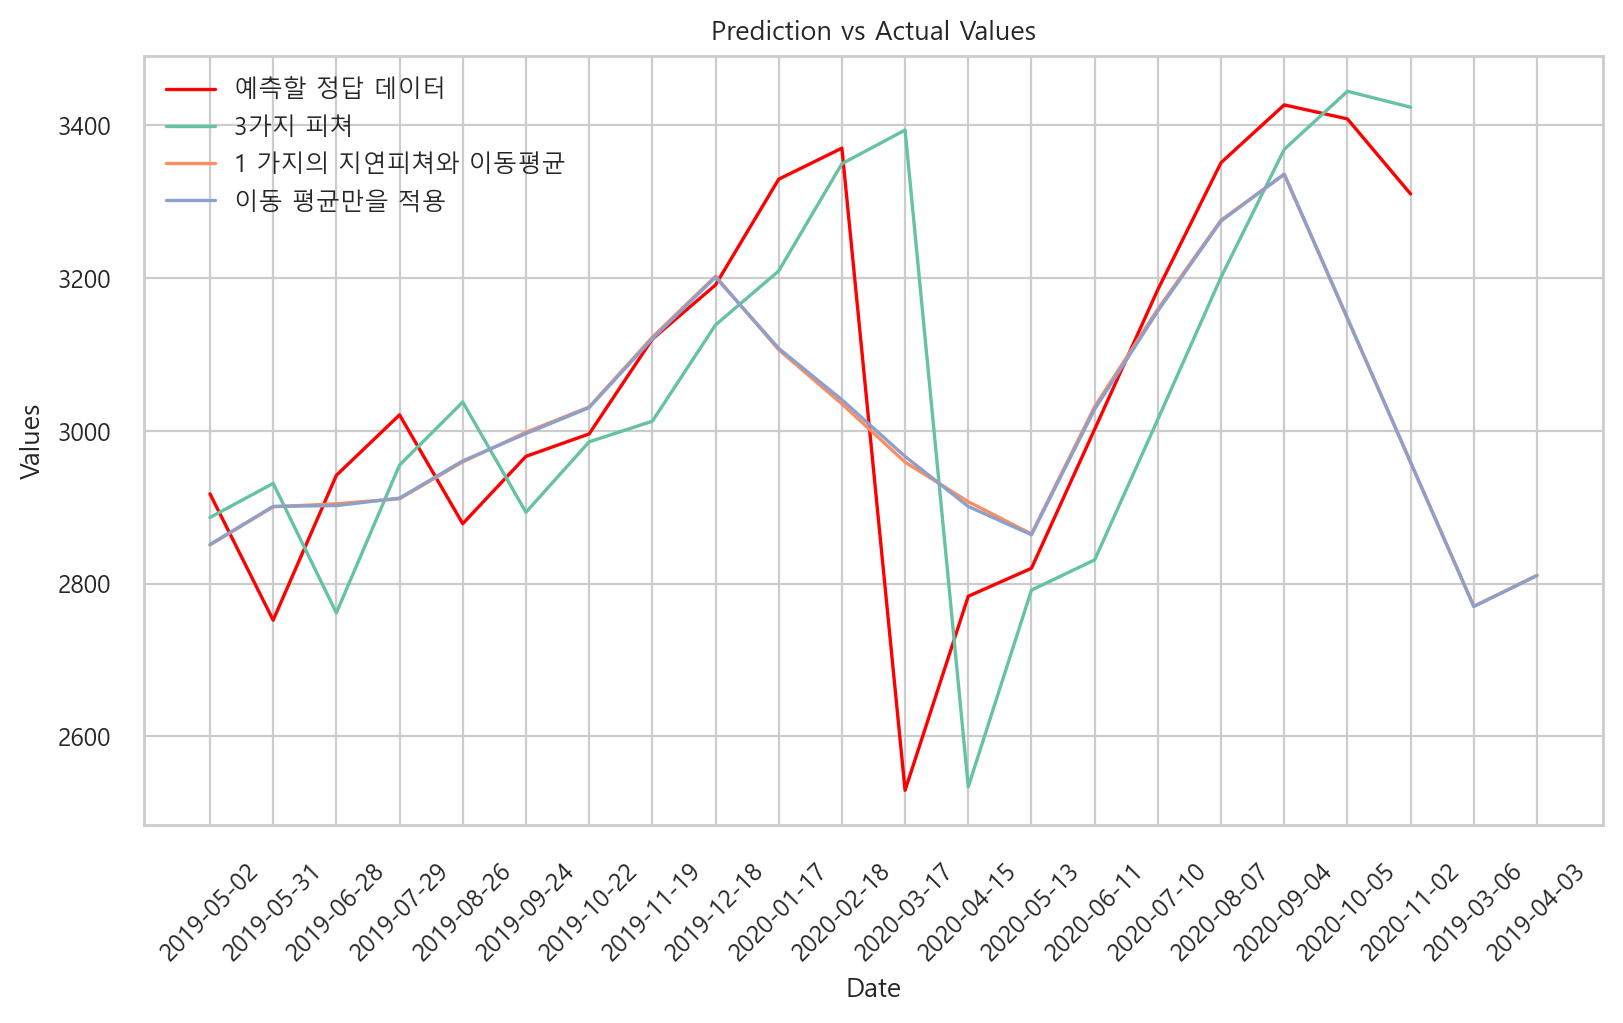

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(8,5))


sns.lineplot(x=snp_20["Date"].loc[y_test.index],
             y=y_test,
             color="red",
             label="예측할 정답 데이터",)

sns.lineplot(x=snp_20["Date"].loc[y_fore_2.index],
             y=y_fore_2,
             label="3가지 피쳐",)

sns.lineplot(x=snp_20["Date"].loc[y_fore_3.index],
             y=y_fore_3,
             label="1 가지의 지연피쳐와 이동평균",)

sns.lineplot(x=snp_20["Date"].loc[y_fore_4.index],
             y=y_fore_4,
             label="이동 평균만을 적용",)

ax.set(xlabel='Date', ylabel='Values', title = "Prediction vs Actual Values")
plt.xticks(rotation=45);

In [ ]:
print("""\
3종의 시간지연 MSE : {:0.2f}
이동평균  MSE : {:0.2f}
이동평균과 1종의 시간 지연 MSE : {:0.2f}\
""".format(
mean_squared_error(y_test_f,y_fore_2),
mean_squared_error(y_test_mm_2,y_fore_4),
mean_squared_error(y_test_mm,y_fore_3),
))

3종의 시간지연 MSE : 51960.70
이동평균  MSE : 21661.19
이동평균과 1종의 시간 지연 MSE : 21629.98


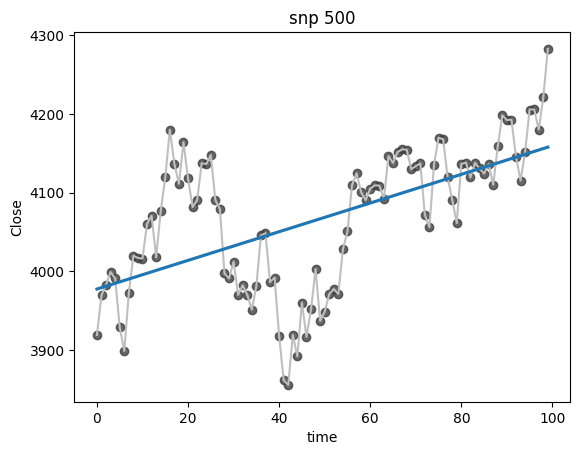

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.plot('time', 'Close', data=snp_500_close_price, color='0.75')
ax = sns.regplot(x='time', y='Close', data=snp_500_close_price, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('snp 500');

## Lag Feature (지연 피쳐)

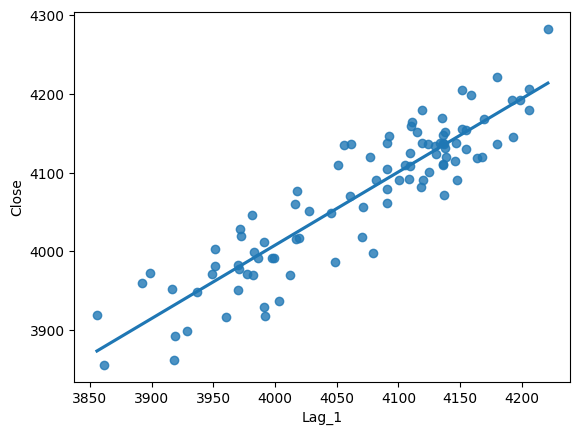

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

snp_500_close_price['Lag_1'] = snp_500_close_price['Close'].shift(1)
snp_500_close_price = snp_500_close_price.dropna()


snp_500_close_price[["Close","Lag_1"]]

sns.regplot(x="Lag_1", y="Close", data=snp_500_close_price, ci=None ); #회귀 플롯 그리기 ( 두 데이터의 상관성을 시각화 ) 

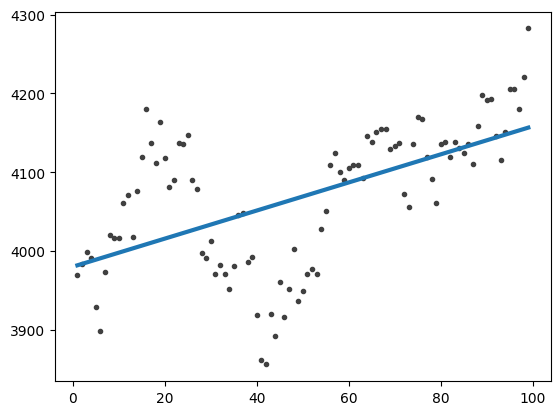

In [10]:
from sklearn.linear_model import LinearRegression

X = snp_500_close_price.loc[:,['time']]
y = snp_500_close_price.loc[:,'Close']

model = LinearRegression()
model.fit(X,y)

y_pred = model.predict(X)

plt.plot(X, y,'.', color='0.25');
plt.plot(X, y_pred, linewidth=3);


In [11]:
snp_500_close_price.dropna()

,Close,time,Lag_1
Date,,,
2023-01-11 00:00:00-05:00,3969.610107,1,3919.250000
2023-01-12 00:00:00-05:00,3983.169922,2,3969.610107
2023-01-13 00:00:00-05:00,3999.090088,3,3983.169922
2023-01-17 00:00:00-05:00,3990.969971,4,3999.090088
2023-01-18 00:00:00-05:00,3928.860107,5,3990.969971
...,...,...,...
2023-05-26 00:00:00-04:00,4205.450195,95,4151.279785
2023-05-30 00:00:00-04:00,4205.520020,96,4205.450195
2023-05-31 00:00:00-04:00,4179.830078,97,4205.520020


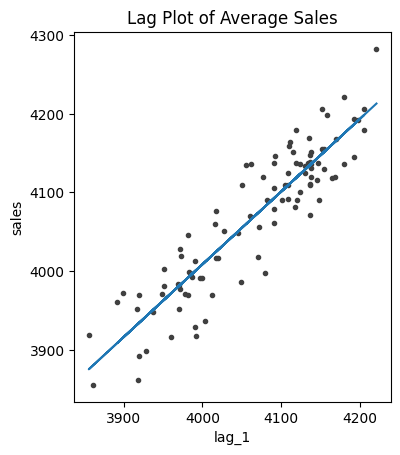

In [12]:
snp_500_close_price = snp_500_close_price
X = snp_500_close_price.loc[:,['Lag_1']]
y = snp_500_close_price.loc[:,'Close']

model = LinearRegression()
model.fit(X,y)

y_pred = model.predict(X)

fig, ax = plt.subplots()
ax.plot(X['Lag_1'], y, '.', color='0.25')
ax.plot(X['Lag_1'], y_pred)
ax.set(aspect='equal', ylabel='sales', xlabel='lag_1', title='Lag Plot of Average Sales');


In [ ]:
import pandas as pd
import numpy as np


snp_500 = pd.read_csv('../datas/study_data/snp500_history.csv',
                      index_col='Date',
                      parse_dates=['Date'])

snp_500_month_end = snp_500.resample('M').last()

# 결과 출력
snp_500_month_end.index = snp_500_month_end.index.to_period()
snp_500_month_end['time'] = np.arange(len(snp_500_month_end.index))

snp_500_month_end

,Open,High,Low,Close,Adj Close,Volume,time
Date,,,,,,,
1927-12,17.660000,17.660000,17.660000,17.660000,17.660000,0,0
1928-01,17.570000,17.570000,17.570000,17.570000,17.570000,0,1
1928-02,17.260000,17.260000,17.260000,17.260000,17.260000,0,2
1928-03,19.280001,19.280001,19.280001,19.280001,19.280001,0,3
1928-04,19.750000,19.750000,19.750000,19.750000,19.750000,0,4
...,...,...,...,...,...,...,...
2020-07,3270.449951,3272.169922,3220.260010,3271.120117,3271.120117,5117260000,1111
2020-08,3509.729980,3514.770020,3493.250000,3500.310059,3500.310059,4342290000,1112
2020-09,3341.209961,3393.560059,3340.469971,3363.000000,3363.000000,4722530000,1113


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats("png2x") # svg, retina, png2x ...
mpl.style.use("seaborn")
mpl.rcParams.update({"figure.constrained_layout.use": True})
sns.set_context("paper") 
sns.set_palette("Set2") 
sns.set_style("whitegrid") 

plt.rc("font", family = "Malgun Gothic")
plt.rcParams["axes.unicode_minus"] = False

C:\Users\crazy\AppData\Local\Temp\ipykernel_34868\1296936438.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  mpl.style.use("seaborn")


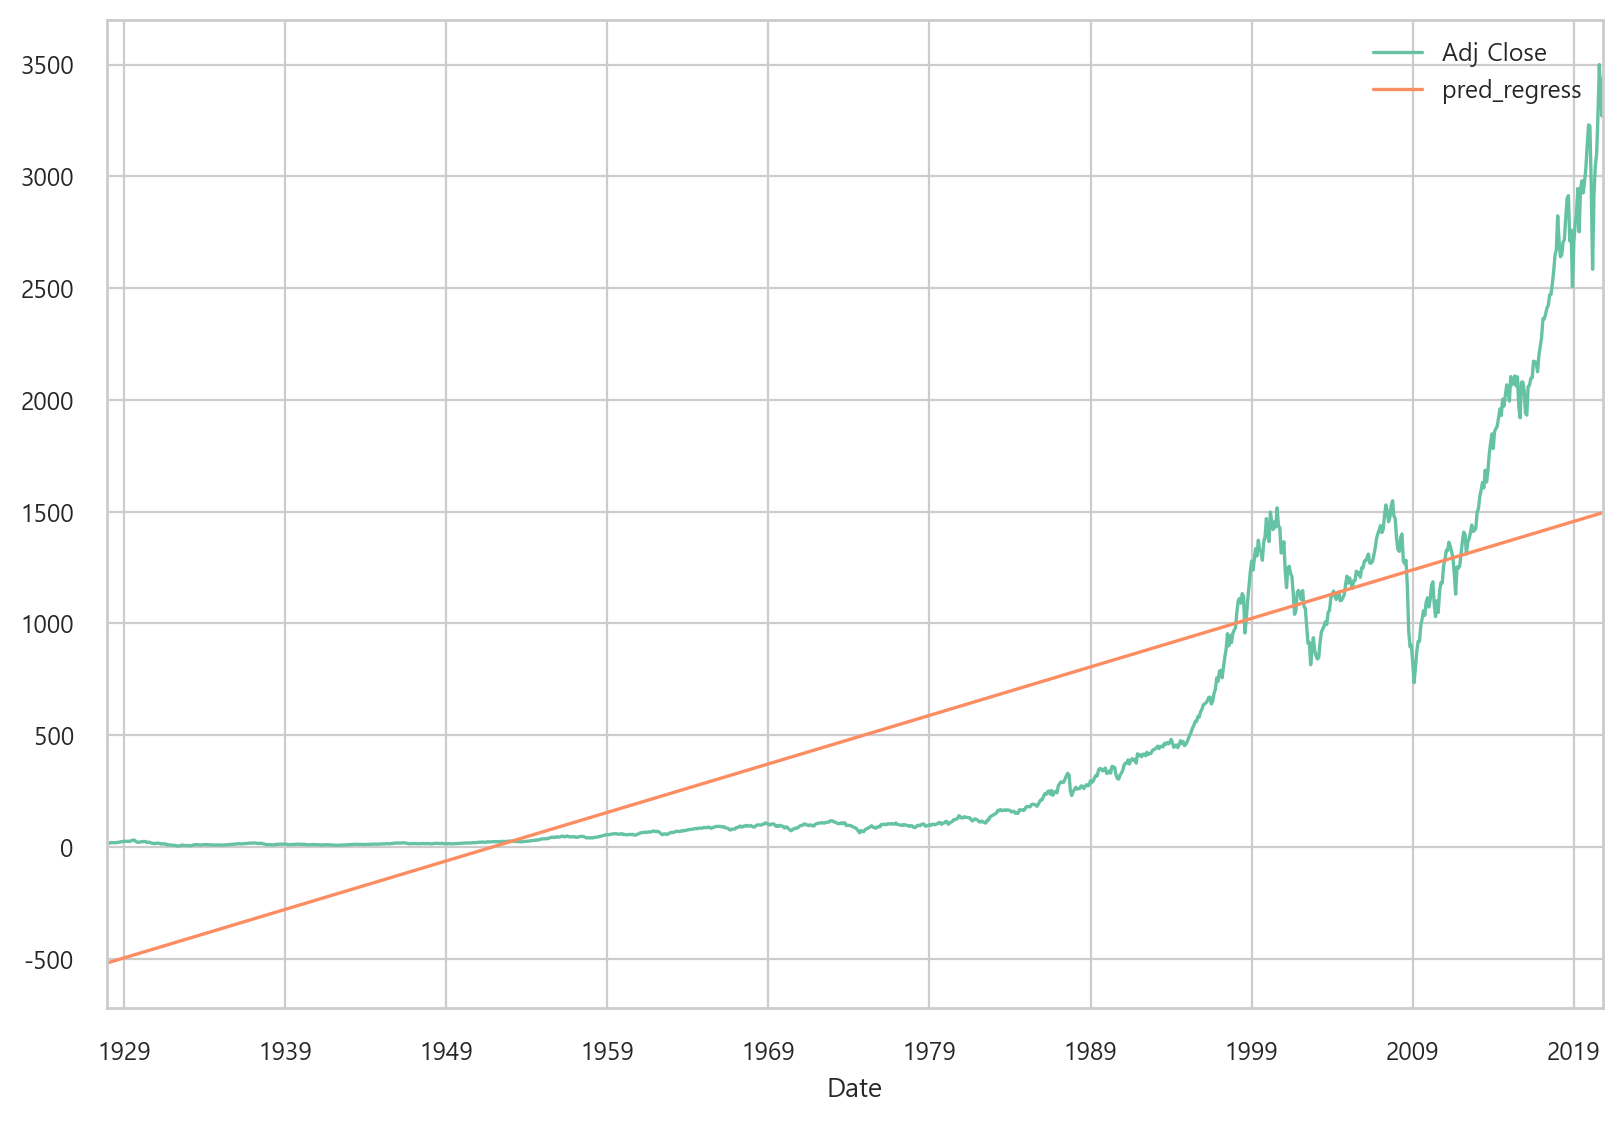

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = snp_500_month_end.loc[:, ['time']]
y = snp_500_month_end.loc[:, ['Adj Close']]

model_lr = LinearRegression()
model_lr.fit(X, y)


y_pred = pd.DataFrame(model_lr.predict(X), columns=["pred_regress"], index=X.index)

fig, ax = plt.subplots(1,1)

y.plot(ax=ax)
y_pred.plot(ax=ax);

In [ ]:
snp_500_month_end['Lag_1'] = snp_500_month_end['Adj Close'].shift(1)
snp_500_month_end.head()

,Open,High,Low,Close,Adj Close,Volume,time,Lag_1
Date,,,,,,,,
1927-12,17.660000,17.660000,17.660000,17.660000,17.660000,0,0,NaN
1928-01,17.570000,17.570000,17.570000,17.570000,17.570000,0,1,17.660000
1928-02,17.260000,17.260000,17.260000,17.260000,17.260000,0,2,17.570000
1928-03,19.280001,19.280001,19.280001,19.280001,19.280001,0,3,17.260000
1928-04,19.750000,19.750000,19.750000,19.750000,19.750000,0,4,19.280001


In [ ]:
from sklearn.linear_model import LinearRegression

X = snp_500_month_end.loc[:, ['Lag_1']]
X.dropna(inplace=True)  # drop missing values in the feature set
y = snp_500_month_end.loc[:, 'Adj Close']  # create the target
y, X = y.align(X, join='inner')  # drop corresponding values in target

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

Text(0.5, 0, 'Lag_1')

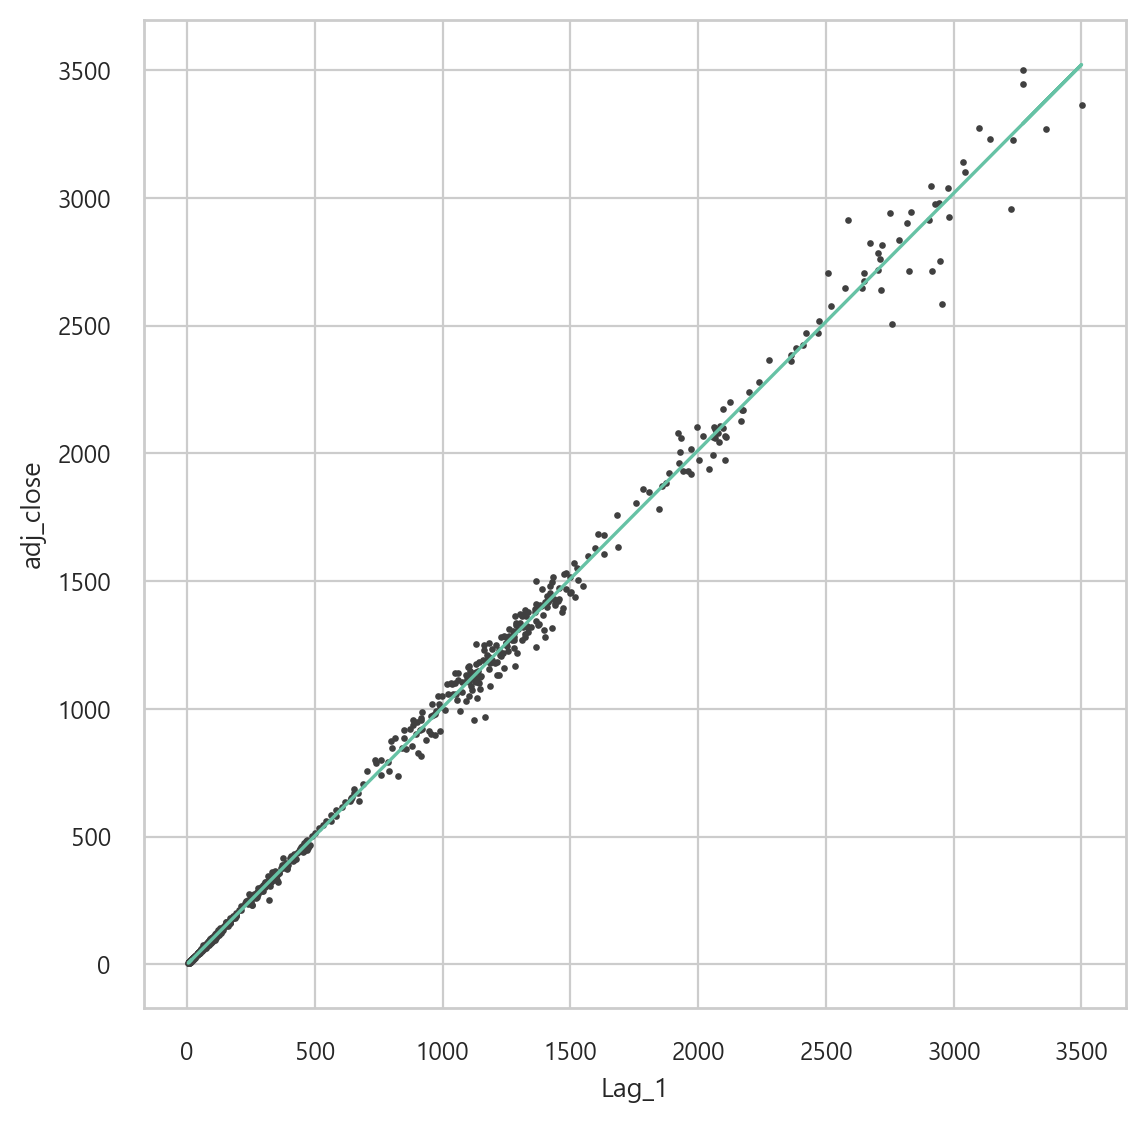

In [ ]:
fig, ax = plt.subplots()
ax.plot(X['Lag_1'], y, '.', color='0.25')
ax.plot(X['Lag_1'], y_pred)
ax.set_aspect('equal')
ax.set_ylabel('adj_close')
ax.set_xlabel('Lag_1')


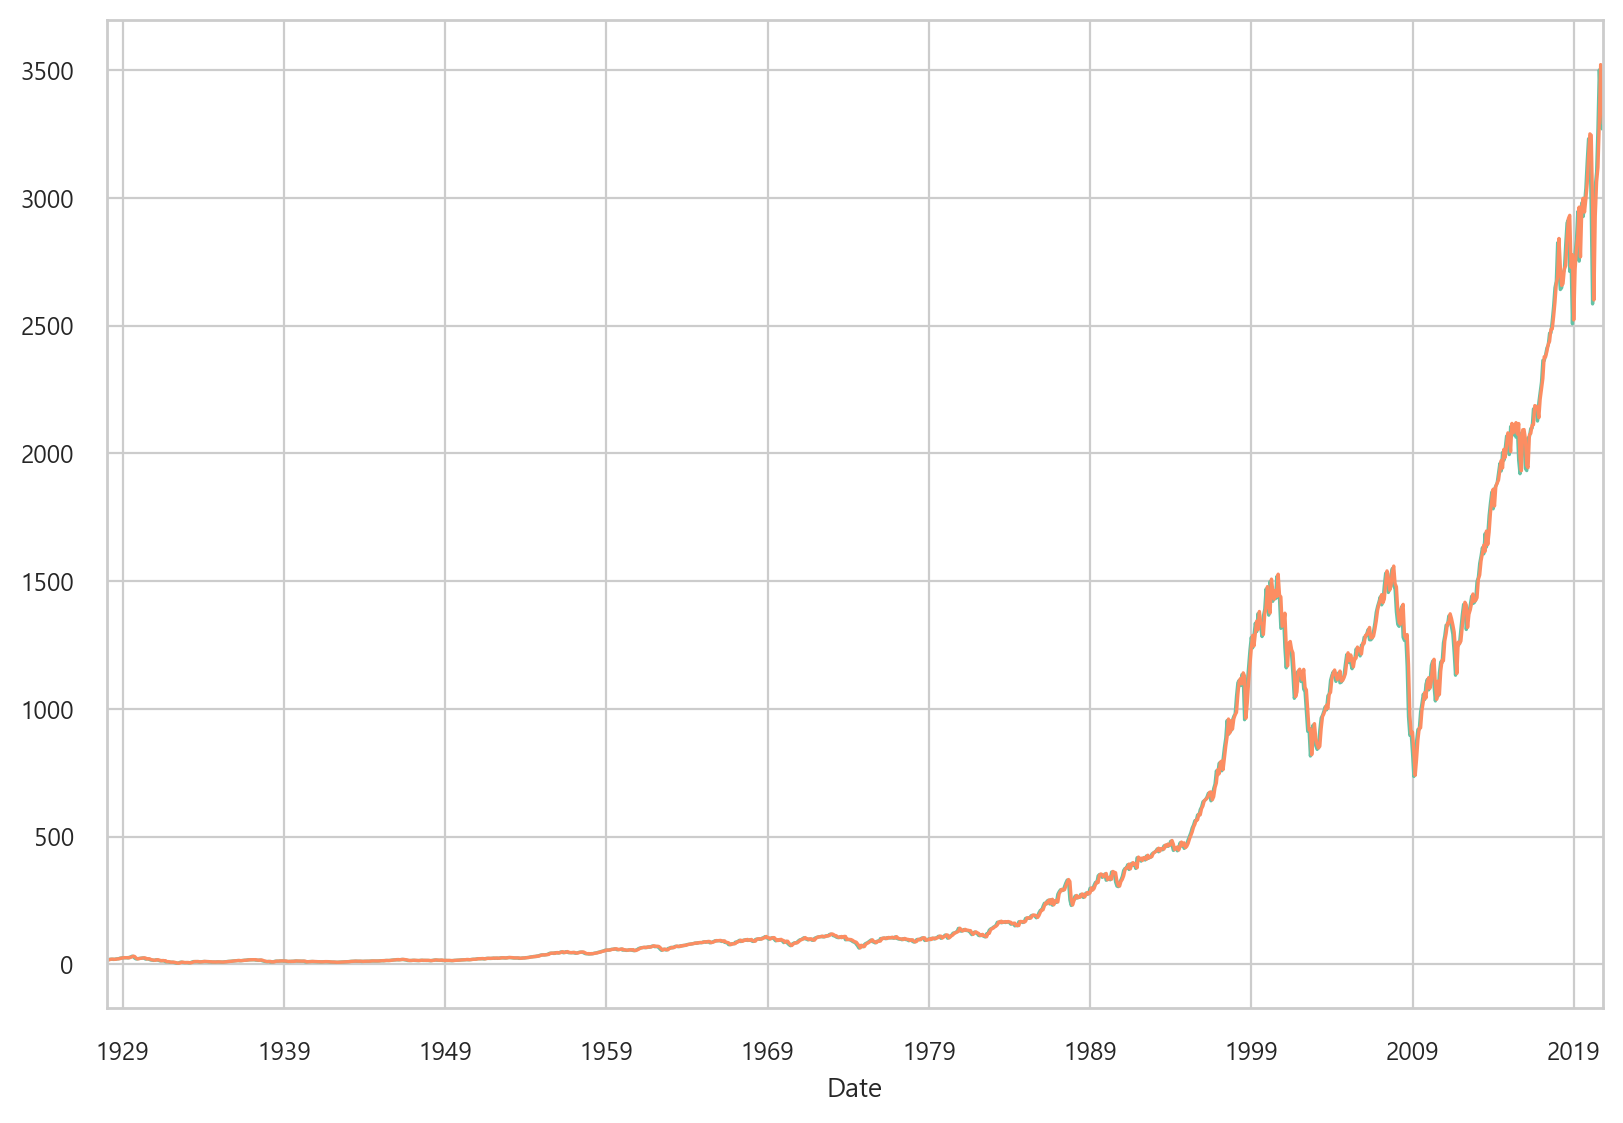

In [ ]:
ax = y.plot()
ax = y_pred.plot()